# Softmax Regression from Scratch

## 1. **Intuitive Overview**

Softmax Regression, also known as **Multinomial Logistic Regression**, is a generalization of logistic regression for multi-class classification problems. While logistic regression is used for binary classification, softmax regression can handle cases where the target variable can take on more than two classes.

**Analogy:**  
Imagine you are at an ice cream shop with three flavors: vanilla, chocolate, and strawberry. Given your preferences (features), softmax regression helps estimate the probability that you will choose each flavor.

---

## 2. **Mathematical Foundations**

### **2.1. Model Formulation**

Given an input vector $\mathbf{x} \in \mathbb{R}^d$ and $K$ possible classes, softmax regression models the probability that $\mathbf{x}$ belongs to class $k$ as:

$[
P(y = k \mid \mathbf{x}) = \frac{\exp(\mathbf{w}_k^\top \mathbf{x} + b_k)}{\sum_{j=1}^K \exp(\mathbf{w}_j^\top \mathbf{x} + b_j)}
]$

- $\mathbf{w}_k$ is the weight vector for class $k$
- $b_k$ is the bias for class $k$

The denominator ensures that the probabilities sum to 1 across all classes.

---

### **2.2. The Softmax Function**

The **softmax function** transforms a vector of real numbers into a probability distribution:

$[
\text{softmax}(\mathbf{z})_k = \frac{\exp(z_k)}{\sum_{j=1}^K \exp(z_j)}
]$

where $\mathbf{z} = [z_1, z_2, ..., z_K]$.

**Key Properties:**
- All outputs are in $(0, 1)$
- Outputs sum to 1

---

### **2.3. Loss Function: Cross-Entropy**

For a dataset with $N$ samples, the **cross-entropy loss** is:

$[
L = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log P(y = k \mid \mathbf{x}_i)
]$

where $y_{ik}$ is 1 if sample $i$ belongs to class $k$, else 0.

---

### **2.4. Gradient Derivation**

Let’s derive the gradient for parameter $\mathbf{w}_k$:

$[
\frac{\partial L}{\partial \mathbf{w}_k} = -\frac{1}{N} \sum_{i=1}^N \left[ y_{ik} - P(y = k \mid \mathbf{x}_i) \right] \mathbf{x}_i
]$

**Proof Sketch:**
- The loss is differentiable and convex.
- The gradient points in the direction to adjust weights to minimize the loss.

---

## 3. **Why Softmax?**

- **Generalizes logistic regression** to multi-class problems.
- **Probabilistic interpretation:** Outputs can be interpreted as class probabilities.
- **Differentiable:** Suitable for gradient-based optimization.

---

## 4. **Real-World Analogy**

Think of softmax as a "voting system" where each class assigns a score to the input. The softmax function converts these scores into probabilities, much like how a group of friends might each rate a restaurant, and you use their ratings to decide where to eat.

---

## 5. **Modern Applications in AI/ML**

- **Image Classification:** Assigning labels to images (e.g., cats, dogs, cars).
- **Natural Language Processing:** Predicting the next word in a sentence (language modeling).
- **Recommender Systems:** Ranking items for users.
- **Neural Networks:** The final layer of many neural networks for classification uses softmax.

---

## 6. **Summary Table**

| Aspect                | Logistic Regression (Binary) | Softmax Regression (Multi-class) |
|-----------------------|------------------------------|-----------------------------------|
| Output                | Probability (2 classes)      | Probability distribution (K classes) |
| Activation Function   | Sigmoid                      | Softmax                           |
| Loss Function         | Binary Cross-Entropy         | Categorical Cross-Entropy         |

---

**In summary:**  
Softmax regression is a foundational tool for multi-class classification, combining clear probabilistic interpretation, mathematical elegance, and practical utility in modern AI systems. Understanding its derivation and intuition is essential for mastering machine learning.

## Implementing From Scratch

We will perform following steps while implementing softmax regression from scratch:
1. Generate synthetic data for 3 classes
2. Build softmax function
3. Compute cross-entropy loss
4. Calculate gradients
5. Train with gradient descent
6. Visualize accuracy

### **1. Generating Synthetic Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

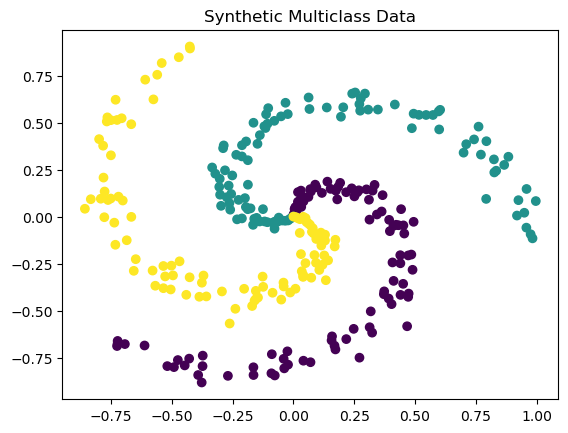

In [2]:
np.random.seed(42)# Set seed for reproducibility
# Generate random data
def generate_data(num_samples_per_class=100):
    X = []
    y = []
    K = 3  # Number of classes
    for j in range(K):
        r = np.linspace(0.0, 1, num_samples_per_class)
        t = np.linspace(j*4, (j+1)*4, num_samples_per_class) + np.random.randn(num_samples_per_class) * 0.2 #theta
        x1 = r * np.sin(t)
        x2 = r * np.cos(t)
        X.append(np.stack([x1, x2], axis=1))
        y.append(np.full(num_samples_per_class, j))
    return np.vstack(X), np.hstack(y)
X, y = generate_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Synthetic Multiclass Data")
plt.show()

### Explanation:

#### Imports and Seed Initialization

```python
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # Set seed for reproducibility
```

* `np.random.seed(42)` ensures the same **random numbers are generated every time you run the script**, making experiments **reproducible**.

> Think of `seed` like setting a "starting point" for randomness, which makes random outputs predictable and repeatable.

---

#### Data Generation Function

```python
def generate_data(num_samples_per_class=100):
    X = []
    y = []
    K = 3  # Number of classes
```


* `generate_data()` creates a dataset with `num_samples_per_class` points for each class.
* `X`: will store all input data points (features).
* `y`: will store the corresponding labels.
* `K = 3`: defines the number of classes (categories).

---

#### Class-wise Data Creation

```python
    for j in range(K):
        r = np.linspace(0.0, 1, num_samples_per_class)
        t = np.linspace(j*4, (j+1)*4, num_samples_per_class) + np.random.randn(num_samples_per_class) * 0.2  # theta
```


* **Looping over each class (0, 1, 2)** to generate its data.
* `r`: radius values spaced from 0 to 1 (same across classes) — used to create spiral effect.
* `t`: theta/angle values, different for each class by shifting them (e.g., `0–4`, `4–8`, `8–12`) to **separate the spirals**.

  * Adding `np.random.randn(...) * 0.2` introduces **noise** to make the data more natural and non-linear.

> This creates **spiral arms** — each class will have a curve shaped differently in angular space.

---

#### Converting Polar to Cartesian

```python
        x1 = r * np.sin(t)
        x2 = r * np.cos(t)
```


* Here we convert polar coordinates $(r, \theta)$ to Cartesian coordinates $(x, y)$ using:

  $$
  x = r \cdot \sin(\theta), \quad y = r \cdot \cos(\theta)
  $$
* `x1`, `x2` are the x and y values of the data points for one class.

---

#### Stack and Label Each Class

```python
        X.append(np.stack([x1, x2], axis=1))
        y.append(np.full(num_samples_per_class, j))
```

* `np.stack([x1, x2], axis=1)` combines the x and y coordinates into 2D points (shape: `[num_samples, 2]`).
* Appended to `X`, which will eventually hold all data.
* `np.full(...)`: fills a vector with class label `j` for each of its `num_samples_per_class` points.
* `np.vstack(X)`: Vertically stacks all class-wise `X` arrays → final shape: `[num_samples_total, 2]`.
* `np.hstack(y)`: Horizontally concatenates all labels into one vector → final shape: `[num_samples_total]`.

---

#### Visualising the Data

```python
X, y = generate_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Synthetic Multiclass Data")
plt.show()
```


* `generate_data()` is called to get `X` (features) and `y` (labels).
* `plt.scatter(...)` creates a 2D scatter plot:

  * `X[:, 0]` → x-axis (first feature)
  * `X[:, 1]` → y-axis (second feature)
  * `c=y` assigns color based on class
  * `cmap='viridis'` gives a visually distinct color map.
* `plt.show()` displays the plot.

> We get a **spiral-like dataset** that can be used to test non-linear classifiers like softmax regression, neural nets, SVMs with RBF kernels, etc.



### **2. Defining Softmax Function**

In [3]:
def softmax(logits):
    logits = logits - np.max(logits, axis=1, keepdims=True)  # For numerical stability
    exp_logits = np.exp(logits)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

### **3. Cross Entropy Loss**


In [5]:
def cross_entropy_loss(probs, y_true):
    N = y_true.shape[0]
    correct_logprobs  = -np.log(probs[np.arange(N), y_true])
    loss = np.sum(correct_logprobs) / N
    return loss

### Explanation 

Here we are defining two core components used in **multiclass classification** problems:

1. `softmax(logits)` – transforms raw prediction scores (logits) into probabilities.
2. `cross_entropy_loss(probs, y_true)` – computes the average negative log-likelihood of the correct classes.

Together, these functions form the **foundation of softmax regression** (multinomial logistic regression).

---

#### Function 1: `softmax(logits)`

```python
def softmax(logits):
    logits = logits - np.max(logits, axis=1, keepdims=True)  # For numerical stability
    exp_logits = np.exp(logits)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
```



`logits = logits - np.max(logits, axis=1, keepdims=True)`

* Large exponentials can cause numerical overflow.
* Subtracting the maximum value from each row ensures that the largest value in each row becomes `0` and all others are ≤ 0, **improving numerical stability**.

> **Intuition:**

* Softmax is shift-invariant:

  $$
  \text{softmax}(x) = \text{softmax}(x - \text{max}(x))
  $$
* This doesn't change the final output but **avoids huge numbers** from `np.exp()`.

`exp_logits = np.exp(logits)`
* Applies the exponential function element-wise to the stabilized logits.
* Makes all values positive and amplifies differences between them.

`return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)`

* Divides each element in a row by the sum of its row.
* Ensures that the output is a **probability distribution** (i.e., all values are between 0 and 1, and each row sums to 1).

---

#### Function 2: `cross_entropy_loss(probs, y_true)`

```python
def cross_entropy_loss(probs, y_true):
    N = y_true.shape[0]
    correct_logprobs  = -np.log(probs[np.arange(N), y_true])
    loss = np.sum(correct_logprobs) / N
    return loss
```

* Computes the **average loss** between predicted probabilities and true class labels.
* Used to train the softmax regression model by **penalizing low probabilities for correct classes**.

`N = y_true.shape[0]`
* Retrieves the number of samples (`N`).
* This will be used to average the loss across the entire batch.

`correct_logprobs = -np.log(probs[np.arange(N), y_true])`
* `probs[np.arange(N), y_true]` selects the predicted probability for the **correct class** for each sample.
* `np.log(...)` computes the log-probability of those correct predictions.
* `-` makes it a **negative log likelihood**, which penalizes confident wrong predictions and rewards confident correct ones.

> **Example:**

* If `probs[2] = [0.1, 0.7, 0.2]` and `y_true[2] = 1`, then we extract `probs[2, 1] = 0.7`, and take `-log(0.7)`.

---
`loss = np.sum(correct_logprobs) / N`

> **Why:**

* Sums the log losses for all samples and **averages** them to compute the total loss.

> **Why average?**

* To make the loss independent of the batch size, so it’s comparable across different mini-batches.

---


### **3. Training Loop with Gradient Descent**


In [6]:
def train_softmax(X, y, num_classes = 3, lr=1.0, num_iters = 1000):
    N, D  = X.shape
    W = np.random.randn(D, num_classes) * 0.01  # initialising weights
    b = np.zeros(num_classes)  # initialising biases
    
    for i in range(num_iters):
        #forward pass
        scores = X @ W + b # Compute scores with shape (N, num_classes)
        probs = softmax(scores)
        loss = cross_entropy_loss(probs, y)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")
            
        # backward pass
        dscores = probs
        dscores[np.arange(N), y] -= 1
        dscores /= N
        
        dW = X.T @ dscores  # Gradient with respect to weights
        db = np.sum(dscores, axis=0, keepdims=True)  # Gradient with respect to biases
        
        #Parameter update
        W -= lr * dW
        b -= lr * db.flatten()
    return W, b

### **5. Evaluating Accuracy**


In [7]:
def predict(X, W, b):
    scores = X @ W + b
    probs = softmax(scores)
    return np.argmax(probs, axis=1)


def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

### **6. Final Step**

Iteration 0, Loss: 1.1005
Iteration 100, Loss: 0.7503
Iteration 200, Loss: 0.7462
Iteration 300, Loss: 0.7459
Iteration 400, Loss: 0.7458
Iteration 500, Loss: 0.7458
Iteration 600, Loss: 0.7458
Iteration 700, Loss: 0.7458
Iteration 800, Loss: 0.7458
Iteration 900, Loss: 0.7458
Training accuracy: 0.5167


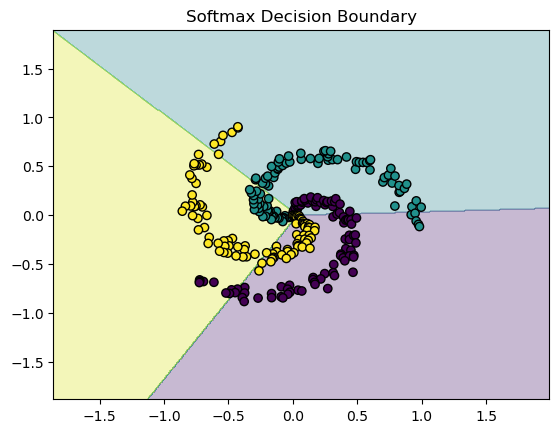

In [8]:
W, b = train_softmax(X,y)
y_pred = predict(X, W, b)

print(f"Training accuracy: {accuracy(y_pred, y):.4f}")

# Visualising the decision boundary
h = 0.01 # Step size in the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, W, b).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors='k')
plt.title("Softmax Decision Boundary")
plt.show()